# Acea Smart Water Analytics
---
> * <i> <b> Created: </b> February 03, 2021 </i>
> * <i> <b> DataOps: </b> Maycon Cypriano Batestin </i>
> * <i> <b> Base: </b> https://www.kaggle.com/c/acea-water-prediction </i>
---
## Welcome
---
> * The Acea Group is one of the leading Italian multiutility operators. Listed on the Italian Stock Exchange since 1999, the company manages and develops water and electricity networks and environmental services. Acea is the foremost Italian operator in the water services sector supplying 9 million inhabitants in Lazio, Tuscany, Umbria, Molise, Campania.

> * In this competition we will focus only on the water sector to help Acea Group preserve precious waterbodies. As it is easy to imagine, a water supply company struggles with the need to forecast the water level in a waterbody (water spring, lake, river, or aquifer) to handle daily consumption. During fall and winter waterbodies are refilled, but during spring and summer they start to drain. To help preserve the health of these waterbodies it is important to predict the most efficient water availability, in terms of level and water flow for each day of the year.
---

## Data
> * The reality is that each waterbody has such unique characteristics that their attributes are not linked to each other. This analytics competition uses datasets that are completely independent from each other. However, it is critical to understand total availability in order to preserve water across the country.

> * Each dataset represents a different kind of waterbody. As each waterbody is different from the other, the related features are also different. So, if for instance we consider a water spring we notice that its features are different from those of a lake. These variances are expected based upon the unique behavior and characteristics of each waterbody. The Acea Group deals with four different type of waterbodies: water springs, lakes, rivers and aquifers.
---

## Challenge
> * Can you build a story to predict the amount of water in each unique waterbody? The challenge is to determine how features influence the water availability of each presented waterbody. To be more straightforward, gaining a better understanding of volumes, they will be able to ensure water availability for each time interval of the year.

> * The time interval is defined as day/month depending on the available measures for each waterbody. Models should capture volumes for each waterbody(for instance, for a model working on a monthly interval a forecast over the month is expected).

> * The desired outcome is a notebook that can generate four mathematical models, one for each category of waterbody (acquifers, water springs, river, lake) that might be applicable to each single waterbody.
--
## Sumary:
---
> 1. Loading Data
> 2. Visulization of Data
> 3. Data imputation
> 4. Exploratory Analysis and Feature Engineering
> 5. Prediction

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# Carregando os dados (Loading Datas)

AquiferDoganella=pd.read_csv('Aquifer_Doganella.csv')
AquiferAuser=pd.read_csv('Aquifer_Auser.csv')
WaterSpringAmiata=pd.read_csv('Water_Spring_Amiata.csv')
LakeBilancino=pd.read_csv('Lake_Bilancino.csv')
WaterSpringMadonna=pd.read_csv('Water_Spring_Madonna_di_Canneto.csv')
AquiferLuco=pd.read_csv('Aquifer_Luco.csv')
AquiferPetrignano=pd.read_csv('Aquifer_Petrignano.csv')
WaterSpringLupa=pd.read_csv('Water_Spring_Lupa.csv')
RiverArno=pd.read_csv('River_Arno.csv')

In [3]:
# juntando todos os dataset em um (join all dataset in just one called 'dados')
dados = [AquiferDoganella,AquiferAuser,WaterSpringAmiata,LakeBilancino,WaterSpringMadonna,
           AquiferLuco,AquiferPetrignano,WaterSpringLupa,RiverArno]
dados_arquivos=['Aquifer_Doganella.csv', 'Aquifer_Auser.csv', 'Water_Spring_Amiata.csv', 'Lake_Bilancino.csv', 'Water_Spring_Madonna_di_Canneto.csv', 'Aquifer_Luco.csv', 'Aquifer_Petrignano.csv', 'Water_Spring_Lupa.csv', 'River_Arno.csv']

In [4]:
dados_arquivos

['Aquifer_Doganella.csv',
 'Aquifer_Auser.csv',
 'Water_Spring_Amiata.csv',
 'Lake_Bilancino.csv',
 'Water_Spring_Madonna_di_Canneto.csv',
 'Aquifer_Luco.csv',
 'Aquifer_Petrignano.csv',
 'Water_Spring_Lupa.csv',
 'River_Arno.csv']

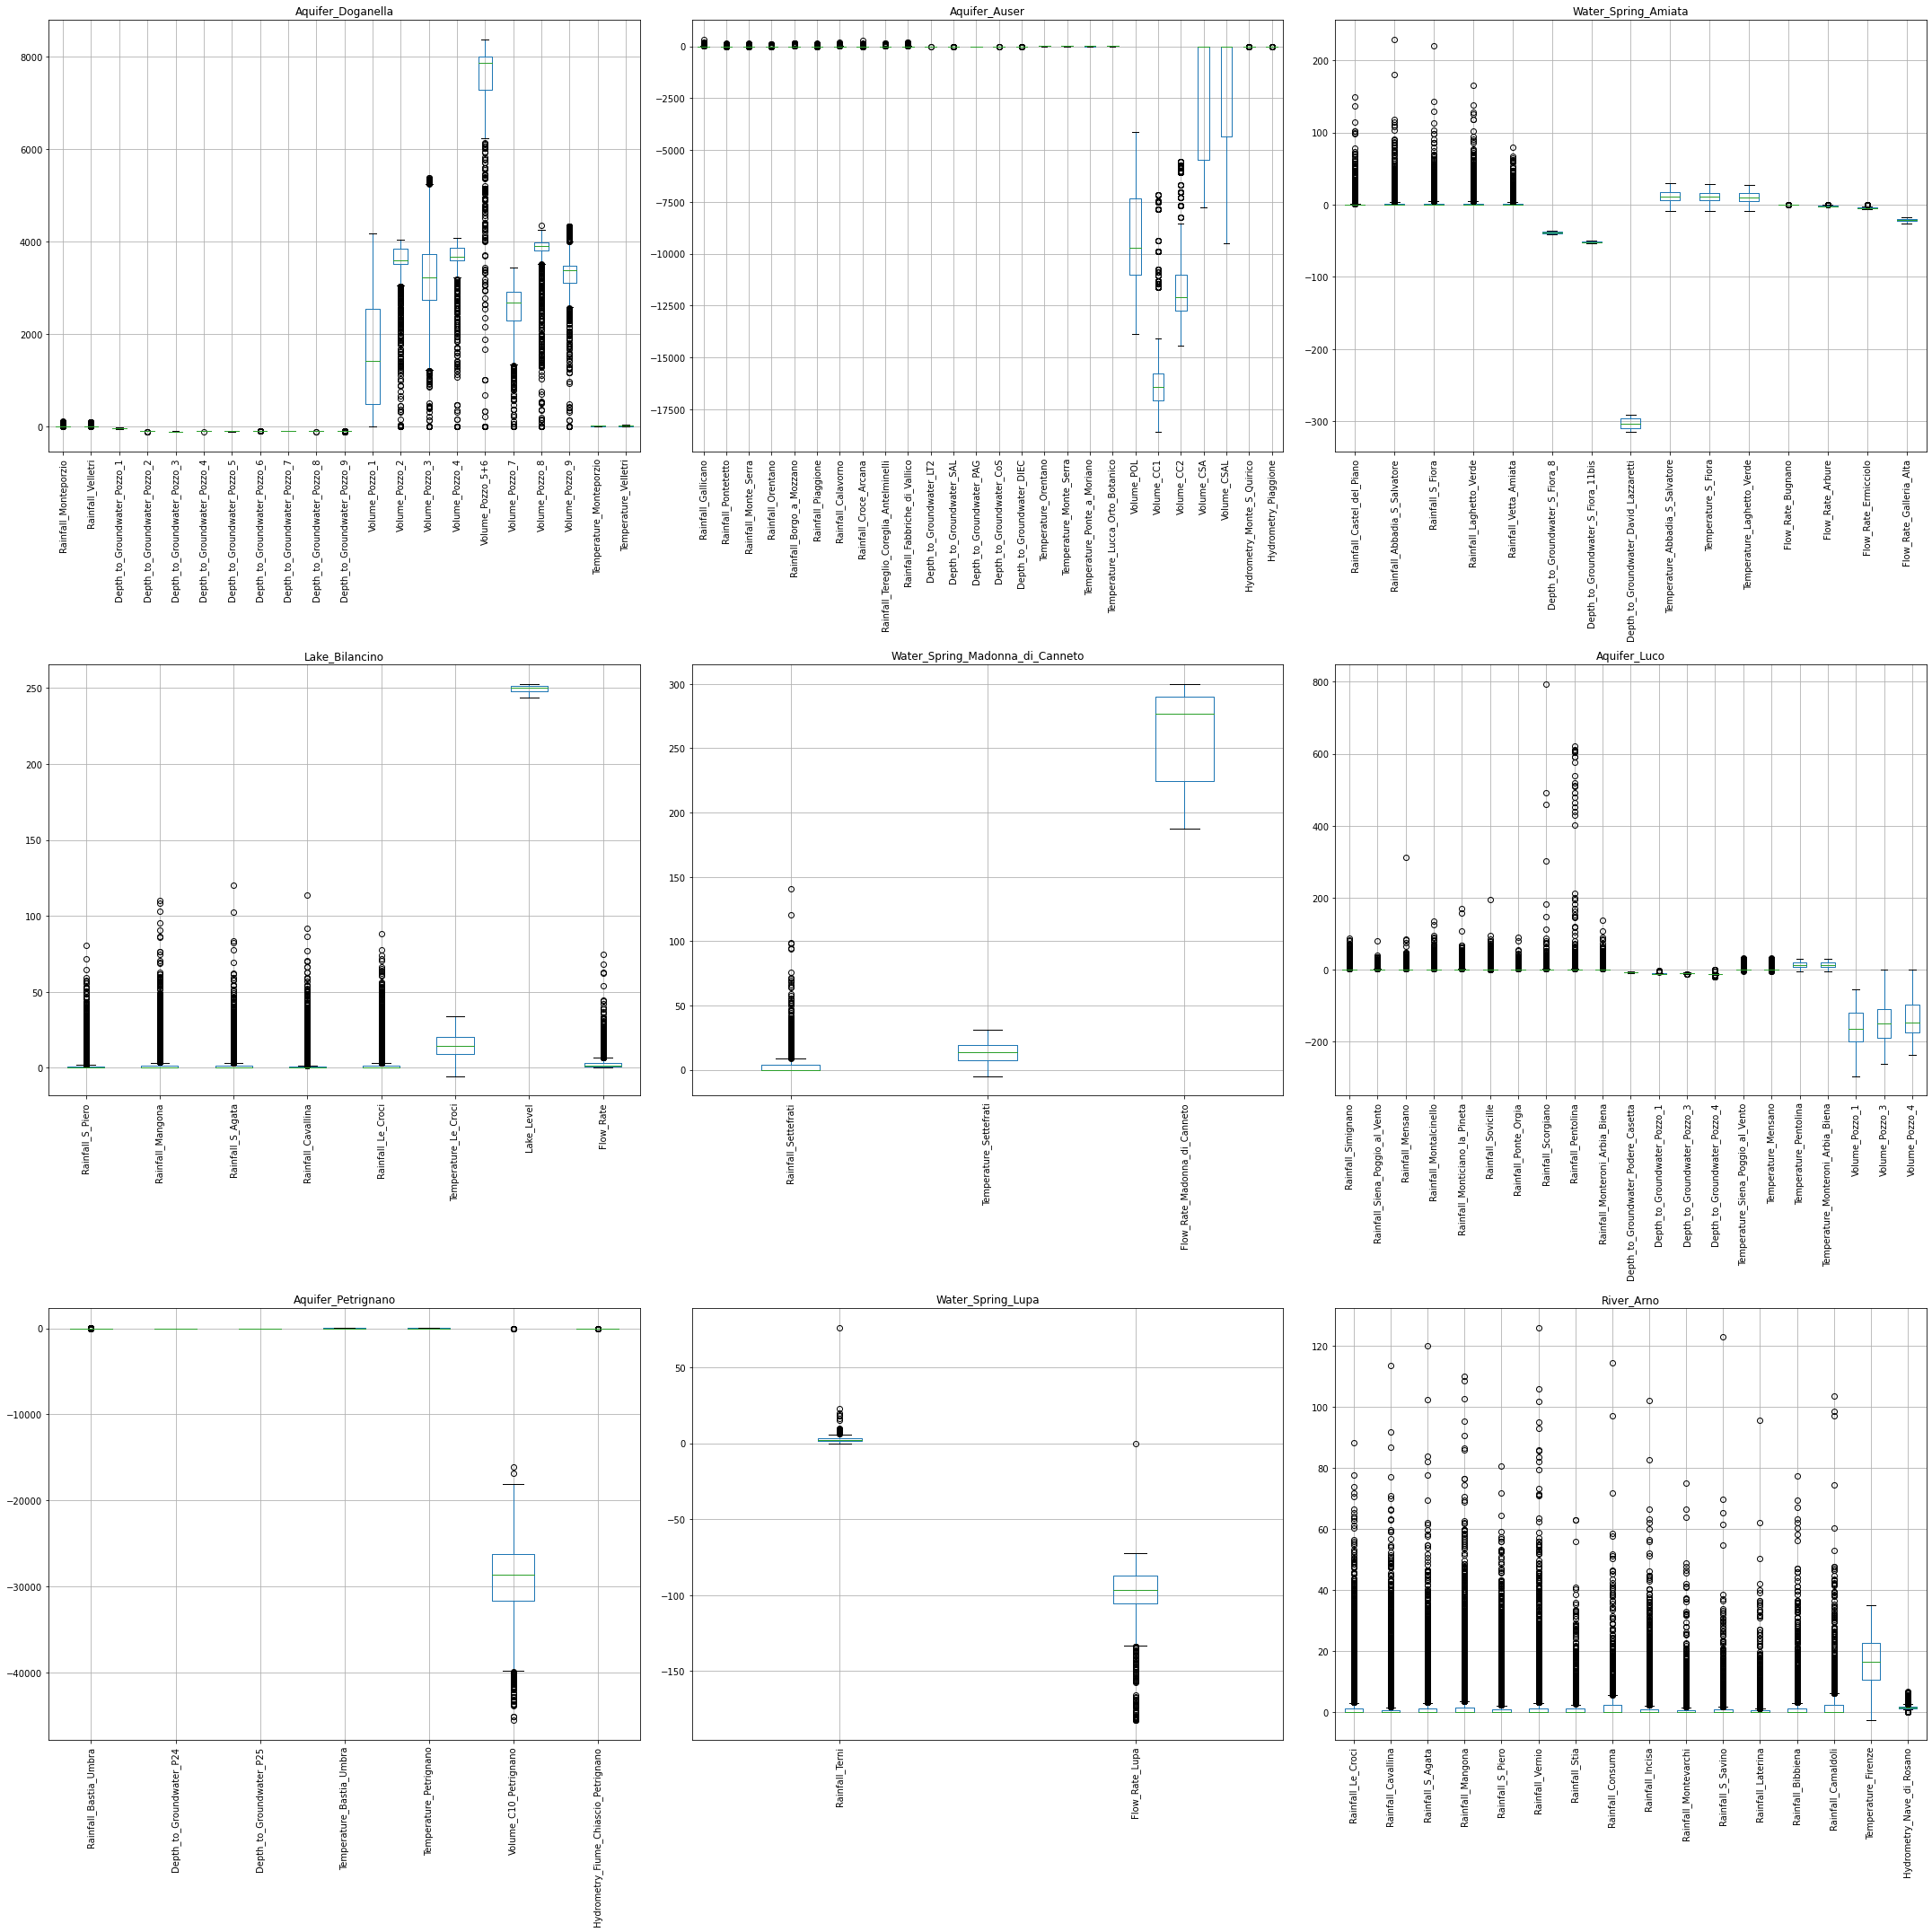

In [5]:
# Visualizando os dados (Data Visualization)
fig,ax1 = plt.subplots(3,3,figsize=(30,30))
for i in range(len(dados)):
    ax1.flatten()[i].set_title(dados_arquivos[i][:-4])
    dados[i][dados[i].columns[1:]].boxplot(ax=ax1.flatten()[i],rot=90)
plt.tight_layout()

## Analyze
---
> * A visualização de dados informa quais são as variaveis do nosso projeto, contudo, ainda não explica precipitação ou taxa de fluxo, por isso mais analises serão necessarias.
---
> * (The visualization of data informs what are the variables of our project, however, it still does not explain precipitation or flow rate, so more analysis will be necessary.)

In [6]:
def plot1(inputdata,features,target_var,ylabel1,ylabel2):
    fig, ax1= plt.subplots(figsize=(15,5))
    ax1.bar(inputdata['Year-mon'],inputdata[features])
    ax1.spines['left'].set_color('black')
    ax1.spines['left'].set_linewidth(3)
    ax1.legend([features],loc=2)
    ax2 =ax1.twinx()
    ax2.plot(inputdata['Year-mon'],inputdata[target_var],color='grey')
    ax2.spines['right'].set_color('blue')
    ax2.spines['right'].set_linewidth(3)
    ax1.set_ylabel(ylabel1)
    ax1.set_xticks(range(0,len(inputdata),10))
    ax1.set_xticklabels(inputdata['Year-mon'][range(0,len(inputdata),10)],rotation=90)
    ax2.set_ylabel(ylabel2)
    ax2.set_xticks(range(0,len(inputdata),10))
    ax2.set_xticklabels(inputdata['Year-mon'][range(0,len(inputdata),10)],rotation=90)
    ax2.legend([target_var[0]],loc=1)

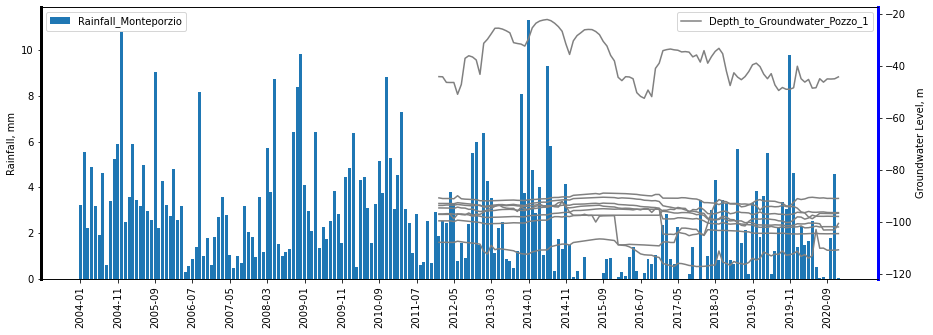

In [7]:
# converting dates
for i in range(len(dados)): 
  dados[i].drop(dados[i][dados[i].Date.isnull()].index,inplace = True,axis=0)
  dados[i]['Year-mon']=pd.to_datetime(dados[i].Date).apply(lambda x: x.strftime('%Y-%m'))
dados_monthly = [dados[i].groupby('Year-mon').mean().reset_index() for i in range(len(dados))]

dadosSelect=['Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_2',
       'Depth_to_Groundwater_Pozzo_3', 'Depth_to_Groundwater_Pozzo_4',
       'Depth_to_Groundwater_Pozzo_5', 'Depth_to_Groundwater_Pozzo_6',
       'Depth_to_Groundwater_Pozzo_7', 'Depth_to_Groundwater_Pozzo_8',
       'Depth_to_Groundwater_Pozzo_9', ]
plot1(dados_monthly[0],'Rainfall_Monteporzio',dadosSelect,'Rainfall, mm','Groundwater Level, m')

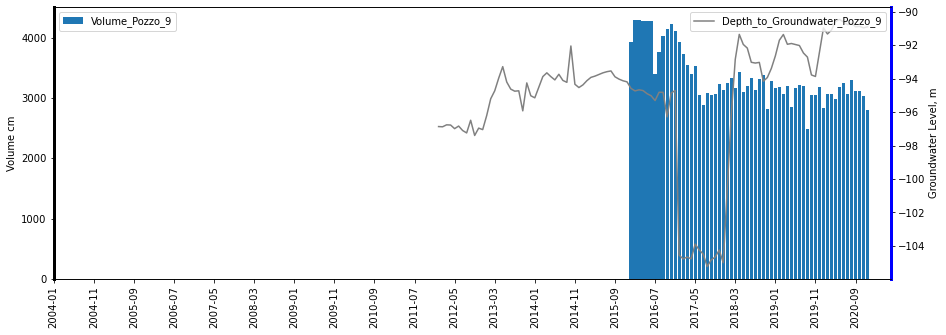

In [8]:
plot1(dados_monthly[0],'Volume_Pozzo_9',['Depth_to_Groundwater_Pozzo_9'],'Volume cm','Groundwater Level, m')

## Analyze
---
> * Apparently the cause of water loss, in the Pozzo_1 and Pozzo_9 wells, may be due to the lack of rain
in the years 2015-2017.


In [9]:
# setup a variavel aim
aim = [[col for col in dados_monthly[0].columns if 'Depth' in col]]
aim.append([col for col in dados_monthly[1].columns if 'Depth' in col])
aim.append([col for col in dados_monthly[2].columns if 'Flow_Rate' in col])
aim.append([col for col in dados_monthly[3].columns if 'Lake' in col])
aim.append([col for col in dados_monthly[4].columns if 'Flow_Rate' in col])
aim.append([col for col in dados_monthly[5].columns if 'Depth' in col])
aim.append([col for col in dados_monthly[6].columns if 'Depth' in col])
aim.append([col for col in dados_monthly[7].columns if 'Flow_Rate' in col])
aim.append([col for col in dados_monthly[8].columns if 'Hydrometry' in col])

In [10]:
# create a season for see that if it can help improve prediction
for i in range(len(dados_monthly)):
    dados_monthly[i].loc[dados_monthly[i]['Year-mon'].str.split('-').str[1].str.contains('12|01|02'),'season']=1
    dados_monthly[i].loc[dados_monthly[i]['Year-mon'].str.split('-').str[1].str.contains('03|04|05'),'season']=2
    dados_monthly[i].loc[dados_monthly[i]['Year-mon'].str.split('-').str[1].str.contains('06|07|08'),'season']=3
    dados_monthly[i].loc[dados_monthly[i]['Year-mon'].str.split('-').str[1].str.contains('09|10|11'),'season']=4


In [11]:

for i in range(len(dados_monthly)):
    dados_monthly[i].loc[dados_monthly[i].iloc[:,1]>(dados_monthly[i].iloc[:,1].mean()+dados_monthly[i].iloc[:,1].std()),'dryness']=4
    dados_monthly[i].loc[(dados_monthly[i].iloc[:,1]<=(dados_monthly[i].iloc[:,1].mean()+dados_monthly[i].iloc[:,1].std())) & (dados_monthly[i].iloc[:,1]>dados_monthly[i].iloc[:,1].mean()),'dryness']=3
    dados_monthly[i].loc[(dados_monthly[i].iloc[:,1]>=(dados_monthly[i].iloc[:,1].mean()-dados_monthly[i].iloc[:,1].std())) & (dados_monthly[i].iloc[:,1]<=dados_monthly[i].iloc[:,1].mean()),'dryness']=2
    dados_monthly[i].loc[dados_monthly[i].iloc[:,1]<(dados_monthly[i].iloc[:,1].mean()-dados_monthly[i].iloc[:,1].std()),'dryness']=1


In [12]:
# create features of previous month for analyzes 
for i in range(len(dados_monthly)):
    newDado =[newDado for newDado in dados_monthly[i].columns if newDado not in aim[i]][1:]
    for j in range(len(newDado)):
        dados_monthly[i][f'{newDado[j]}_previous_month1']=np.append([np.nan],dados_monthly[i].iloc[:-1][f'{newDado[j]}'].values)
        

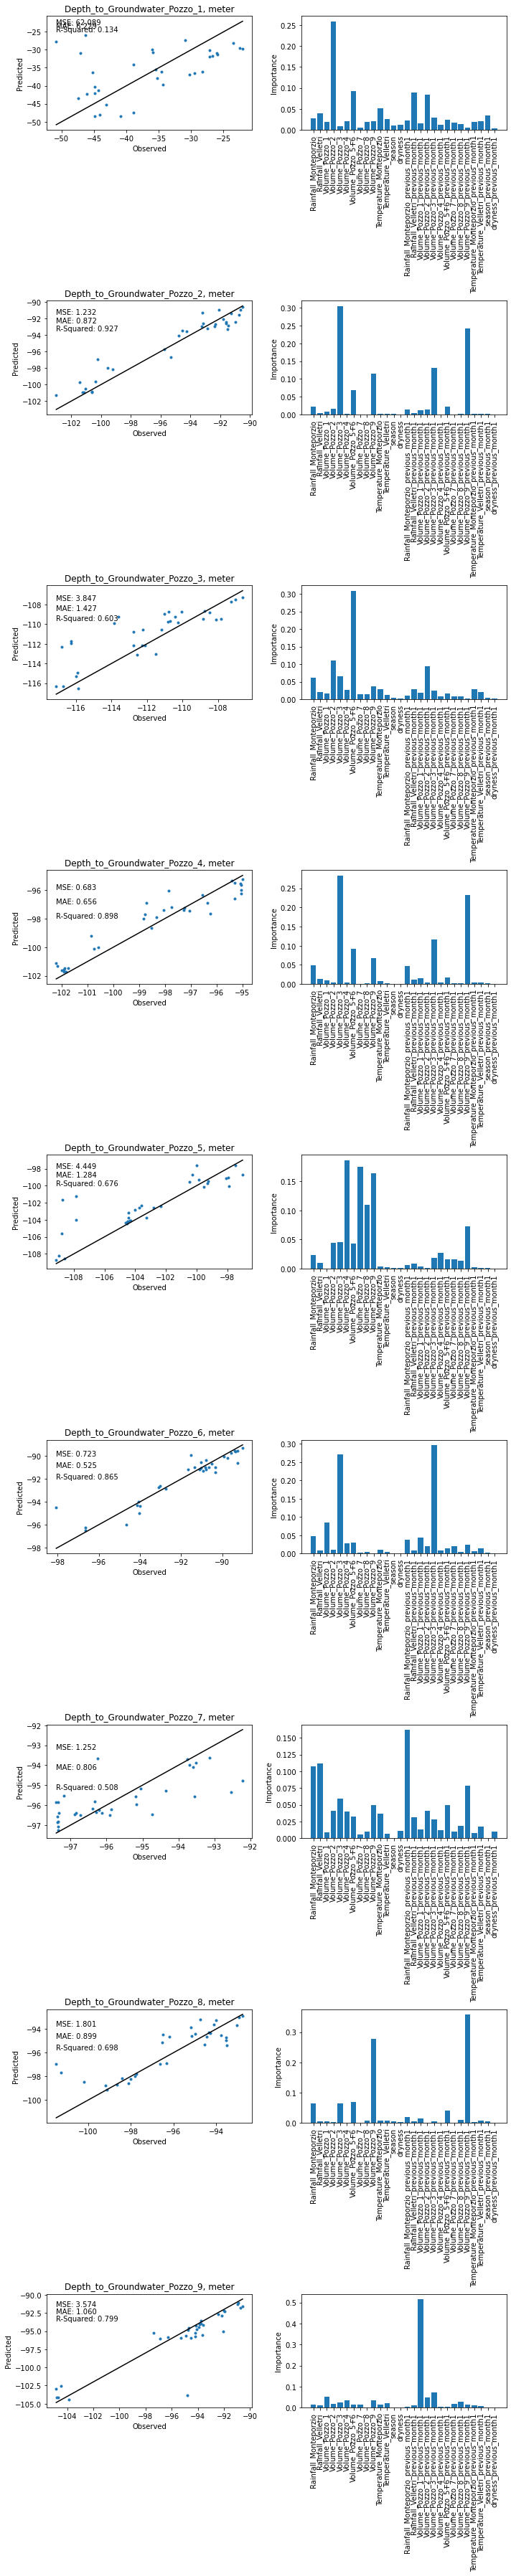

In [13]:
#Accuracy

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
f,ax3 = plt.subplots(9,2,figsize=(10,50))
# dataframe
index=[dados_arquivos[j][:-4]+': '+item for j, sublist in enumerate(aim) for item in sublist]
start = pd.DataFrame(columns=['MSE','MAE','R-Squared','Top 3 important features'],index=index)
for j in range(len(aim)):
    for i,target in enumerate(aim[j]):
        #select non-null values
        idx1 = dados_monthly[j][target].notnull()
        data = dados_monthly[j][idx1].fillna(dados_monthly[j][idx1].mean())
        x = data.drop(aim[j],axis=1)
        x = x.drop('Year-mon',axis=1)
        y = data[target]
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
        np.random.seed(1234)
        RFG = RandomForestRegressor(n_estimators=40,random_state=0)
        RFG.fit(x_train,y_train)
        importance = RFG.feature_importances_
        

        # output statistics
        start.loc[f'{dados_arquivos[j][:-4]}: {target}','MSE']=f'{mean_squared_error(y_test,RFG.predict(x_test)):.3f}'
        start.loc[f'{dados_arquivos[j][:-4]}: {target}','MAE']=f'{mean_absolute_error(y_test,RFG.predict(x_test)):.3f}' 
        start.loc[f'{dados_arquivos[j][:-4]}: {target}','R-Squared']=f'{r2_score(y_test,RFG.predict(x_test)):.3f}'
        start.loc[f'{dados_arquivos[j][:-4]}: {target}','Top 3 important features']= [list(x.columns[np.argsort(importance)[::-1][:3]])]
        
        # an example of prediction in visulization
        if j == 0:
            ax3[i,0].plot(y_test,RFG.predict(x_test),'.')
            ax3[i,0].plot(np.linspace(np.amin(y_test),np.amax(y_test),100),np.linspace(np.amin(y_test),np.amax(y_test),100),'k')
            ax3[i,0].set_ylabel('Predicted')
            ax3[i,0].set_xlabel('Observed')
            ax3[i,0].text(np.min(y_test),np.max(y_test)-1,f'MSE: {mean_squared_error(y_test,RFG.predict(x_test)):.3f}')
            ax3[i,0].text(np.min(y_test),np.max(y_test)-2,f'MAE: {mean_absolute_error(y_test,RFG.predict(x_test)):.3f}')
            ax3[i,0].text(np.min(y_test),np.max(y_test)-3,f'R-Squared: {r2_score(y_test,RFG.predict(x_test)):.3f}' )
            ax3[i,0].set_title(f'{target}, meter')   
            ax3[i,1].bar(range(len(importance)),importance)
            ax3[i,1].set_xticks(range(len(importance)))
            ax3[i,1].set_xticklabels(x.columns,rotation=90)
            ax3[i,1].set_ylabel('Importance')
    plt.tight_layout()


In [14]:
start

,MSE,MAE,R-Squared,Top 3 important features
Aquifer_Doganella: Depth_to_Groundwater_Pozzo_1,62.089,6.229,0.134,"[[Volume_Pozzo_2, Volume_Pozzo_5+6, Rainfall_V..."
Aquifer_Doganella: Depth_to_Groundwater_Pozzo_2,1.232,0.872,0.927,"[[Volume_Pozzo_3, Volume_Pozzo_9_previous_mont..."
Aquifer_Doganella: Depth_to_Groundwater_Pozzo_3,3.847,1.427,0.603,"[[Volume_Pozzo_5+6, Volume_Pozzo_2, Volume_Poz..."
Aquifer_Doganella: Depth_to_Groundwater_Pozzo_4,0.683,0.656,0.898,"[[Volume_Pozzo_3, Volume_Pozzo_9_previous_mont..."
Aquifer_Doganella: Depth_to_Groundwater_Pozzo_5,4.449,1.284,0.676,"[[Volume_Pozzo_4, Volume_Pozzo_7, Volume_Pozzo..."
Aquifer_Doganella: Depth_to_Groundwater_Pozzo_6,0.723,0.525,0.865,"[[Volume_Pozzo_3_previous_month1, Volume_Pozzo..."
Aquifer_Doganella: Depth_to_Groundwater_Pozzo_7,1.252,0.806,0.508,"[[Rainfall_Monteporzio_previous_month1, Rainfa..."
Aquifer_Doganella: Depth_to_Groundwater_Pozzo_8,1.801,0.899,0.698,"[[Volume_Pozzo_9_previous_month1, Volume_Pozzo..."
Aquifer_Doganella: Depth_to_Groundwater_Pozzo_9,3.574,1.060,0.799,"[[Volume_Pozzo_1_previous_month1, Volume_Pozzo..."
Aquifer_Auser: Depth_to_Groundwater_LT2,0.138,0.200,0.861,"[[Volume_POL_previous_month1, Volume_POL, Hydr..."


In [15]:
# General Media of Everything
start.iloc[:,0:3].astype(float).mean()

MSE          20.016536
MAE           1.676607
R-Squared     0.602750
dtype: float64

## Conclusions:
---
> Analyzing the tables above, we noticed a precision in the test data, using the random forest algorithm for this.
However, more significant data can be entered and the model is better work, still, the model presented helps in the performance in solving the problems presented.

In [16]:
start.to_csv('projectFinal.csv', index=False)